In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import nc_time_axis
from nc_time_axis import AutoCFTimeFormatter, NetCDFTimeDateLocator
from matplotlib.dates import AutoDateLocator
import cftime
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
mt_path = "/pub/mariant3/WarmWaterMasses/data/"
ds = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc", chunks={'time':100}).sel(xh=slice(-130, -70), yh=slice(8, 38)).sel(time=slice("0186","0189"))
region_tos = ds['tos'].sel(xh=slice(-130, -70), yh=slice(8, 38))
#ds = xr.open_mfdataset(f"{dir_path}/data/ocean_daily_cmip*.nc", chunks={'time':100}).sel(xh=slice(-130, -70), yh=slice(8, 38))
#region_tos = ds['tos']
clim = xr.open_dataarray(f"{mt_path}/climatology/climatology-manso-0186-01-01-0189-12-31.nc")
per95 = xr.open_dataset(f"{mt_path}/per95-manso-0186-01-01-0189-12-31.nc")
max = xr.open_dataset(f"{mt_path}/climatology/climatology-max-manso-tos-0186-01-01-0189-12-31.nc")

In [3]:
clim_max = clim.max(["xh","yh"]).load()
region_mean = region_tos.mean(["xh","yh"]).load()
clim_mean = clim.mean(["xh","yh"]).load()
per95_mean = per95.tos.mean(["xh","yh"]).load()

In [4]:
max_mean = max.tos.mean(["xh","yh"]).load()

In [5]:
region_tos_max = region_tos.max(["xh","yh"]).load()
region_tos_min = region_tos.min(["xh","yh"]).load()

In [6]:
max_time = clim.where(clim == clim.max().item() , drop=True).time[0].values

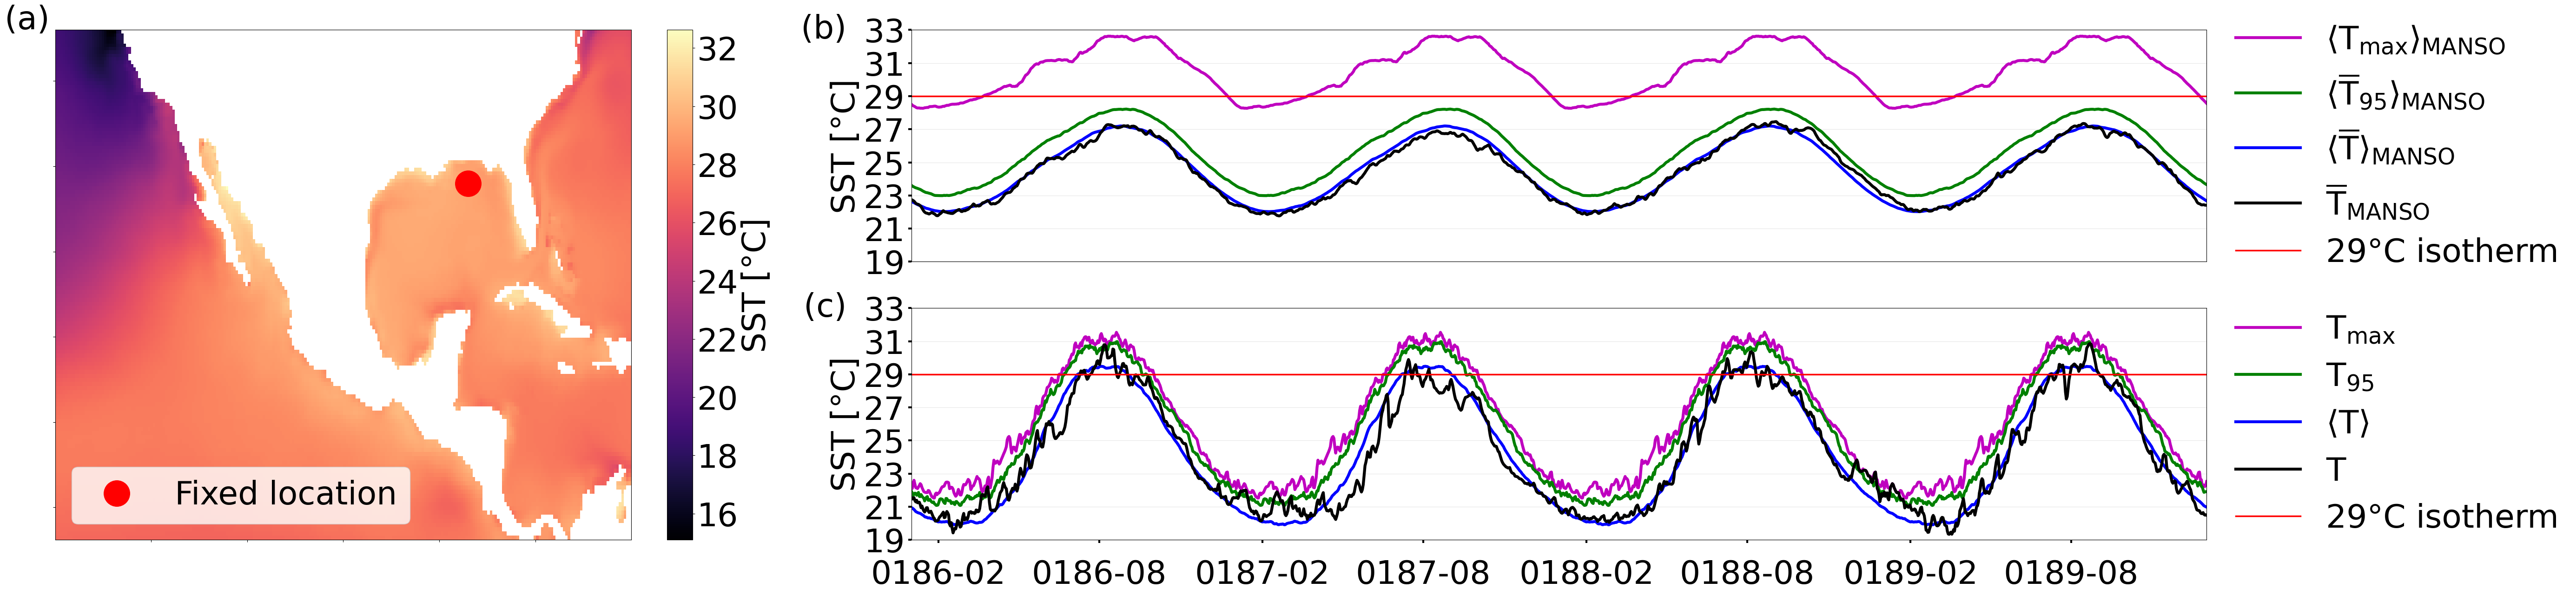

In [8]:
fig = plt.figure(figsize=(50, 13))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1.8], height_ratios=[3, 3])

local_kwargs = {
    "alpha": 1,
    "linewidth": 4.5,
}
region_kwargs = {
    "alpha": 1,
    "linewidth": 4.5,
}

# max_kwargs = {
#     "alpha": 0.6,
#     "linewidth": 2,
# }
fz=50
xh=-87
yh=29

# Center Plot 1 by spanning both rows in the first column
ax1 = fig.add_subplot(gs[:, 0])

cmap = sns.color_palette("magma", as_cmap=True)
#plot = clim.max("time").plot(cmap=cmap)
plot = clim.sel(time=max_time).plot(cmap=cmap)
plt.xlabel("",fontsize=fz)
plt.ylabel("",fontsize=fz)
plot.colorbar.set_label("SST [°C]", fontsize=fz)
plot.colorbar.set_ticks(np.arange(14,33,2)) 
plot.colorbar.ax.tick_params(labelsize=fz)
#ax2.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.plot(xh, yh, 'ro', markersize=40,label="Fixed location")
plt.legend(loc="lower left", fontsize=fz)
#plt.title(f"{clim.sel(time=max_time).time.values}",fontsize=20)
plt.title("")
ax1.text(-0.01, 1.05, "(a)", transform=ax1.transAxes, fontsize=fz,va="top", ha="right") #fontweight="bold"

# Plot 2, 
ax2 = fig.add_subplot(gs[0, 1])
# per95.tos.sel(xh=-88, yh=24, method="nearest").plot(color="g", label=r"$P^{95}_  {\mathit{local}}$", **local_kwargs)
# clim.sel(xh=-88, yh=24, method="nearest").plot(color="b", label=r"climatology (local)", **local_kwargs)
# region_tos.sel(xh=-88, yh=24, method="nearest").plot(color="k", label="SST [°C] (local)", **local_kwargs)
#max_mean.plot(color="m", label=r"$\langle \mathregular{T}_{\mathregular{max}} \rangle_{\mathregular{MANSO}}$", **region_kwargs)
clim_max.plot(color="m", label=r"$\langle \mathregular{T}_{\mathregular{max}} \rangle_{\mathregular{MANSO}}$", **region_kwargs) #ff5e00
per95_mean.plot(color="g", label=r"$\langle \mathregular{\overline{T}}_{\mathregular{95}} \rangle_{\mathregular{MANSO}}$",  **region_kwargs) #label = r"" mean 95th percentile (region)
clim_mean.plot(color="b", label=r"$\langle \mathregular{\overline{T}} \rangle_{\mathregular{MANSO}}$", **region_kwargs)  # r"$\langle \mathrm{climatology} \rangle$" r"$\overline{\Theta}$"
region_mean.plot(color="k", label="$\mathregular{\overline{T}}_{\mathregular{MANSO}}$", **region_kwargs)
#clim_min.plot(color="lightblue", label="maximum climatological \nvalues (region)", **region_kwargs)
plt.axhline(y=29, color='r', linestyle='-', linewidth=2.5,label="29°C isotherm")

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False,fontsize=fz)

ax2.set_xlim(clim.time[0].values, clim.time[-1].values)
locator = NetCDFTimeDateLocator(max_n_ticks=8, calendar="noleap")#, min_n_ticks=0)
ax2.xaxis.set_major_locator(locator)
formatter = AutoCFTimeFormatter(locator=locator, calendar="noleap")
ax2.xaxis.set_major_formatter(formatter)

plt.ylim(19,33)
ax2.tick_params(axis='y', which='major', labelsize=fz, pad=5,width=3,length=5,labelbottom=False)
# plt.xlabel(False)
# #plt.xticks("")
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#ax2.tick_params(axis='x', which='major',bottom=False, labelsize=fz, pad=17,width=3,length=5)#labelrotation=45)

plt.yticks(np.arange(19, 34,2))
plt.grid(axis='y', alpha=0.3)
plt.xlabel("",fontsize=30)
plt.ylabel("SST [°C]",fontsize=fz)
ax2.text(-0.05, 1.07, "(b)", transform=ax2.transAxes, fontsize=fz,va="top", ha="right")

# Plot on Ax3 (second row, second column)
ax3 = fig.add_subplot(gs[1, 1])
max.tos.sel(xh=xh, yh=yh, method="nearest").plot(color="m", label=r"$\mathregular{T}_{\mathregular{max}}$", **local_kwargs)
per95.tos.sel(xh=xh, yh=yh, method="nearest").plot(color="g", label=r"$\mathregular{T}_{\mathregular{95}}$", **local_kwargs)
clim.sel(xh=xh, yh=yh, method="nearest").plot(color="b", label=r"$\langle \mathregular{T} \rangle$", **local_kwargs)
region_tos.sel(xh=xh, yh=yh, method="nearest").plot(color="k", label="T", **local_kwargs)
plt.axhline(y=29, color='r', linestyle='-', linewidth=2.5,label="29°C isotherm")

# clim_max.plot(color="purple", label="maximum climatological \nvalues (region)", **max_kwargs) #ff5e00
# per95_mean.plot(color="g", label=r"$\langle P^{95} \rangle_{\mathit{MANSO}}$",  **region_kwargs) #label = r"" mean 95th percentile (region)
# clim_mean.plot(color="b", label=r"$\langle climatology \rangle_{\mathit{MANSO}}$", **region_kwargs)  # r"$\langle \mathrm{climatology} \rangle$" r"$\overline{\Theta}$"
# region_mean.plot(color="k", label="mean SST (region)", **region_kwargs)
# plt.axhline(y=29, color='r', linestyle='-', linewidth=2,label="threshold (29°C) ")

plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False,fontsize=fz)

ax3.set_xlim(clim.time[0].values, clim.time[-1].values)
locator = NetCDFTimeDateLocator(max_n_ticks=8, calendar="noleap")#, min_n_ticks=0)
ax3.xaxis.set_major_locator(locator)
formatter = AutoCFTimeFormatter(locator=locator, calendar="noleap")
ax3.xaxis.set_major_formatter(formatter)

plt.title("")
plt.ylim(19,33)
ax3.tick_params(axis='y', which='major', labelsize=fz, pad=5,width=3,length=5)
ax3.tick_params(axis='x', which='major', labelsize=fz, pad=25,width=3,length=5)#labelrotation=45)
plt.yticks(np.arange(19, 34, 2))
plt.grid(axis='y', alpha=0.3)
plt.xlabel("",fontsize=30)
plt.ylabel("SST [°C]",fontsize=fz)
ax3.text(-0.05, 1.07, "(c)", transform=ax3.transAxes, fontsize=fz,va="top", ha="right")

plt.tight_layout()  # Tightens layout to reduce excess white space
plt.subplots_adjust(right=0.95)
plt.subplots_adjust(hspace=0.2)

#plt.savefig(f"/pub/mariant3/WarmWaterMasses/figures/climatology-timeseries-max.png",dpi=300,bbox_inches="tight")
plt.show()